In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

# Metainformationen
df1: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 15 MPa, Druckhaltezeit 10s

df2: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 19 MPa, Druckhaltezeit 10s

df3: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 23 MPa, Druckhaltezeit 10s

In [3]:
df1 = pd.read_excel('WS950_WZ90_p15_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()

In [4]:
df1.head()

,Stempel_innen_mitte,Stempel_aussen,Matrize_oben_zarge,Matrize_mitte_zarge,Matrize_unten_zarge,Werkstueck_boden,Werkstueck_flansch,Werkstueck_zarge_mitte,Werkstück_zarge_unten,Werkstueck_zarge_oben
Timestamp,,,,,,,,,,
0.0,90.0,90.0,90.0,90.0,90.0,20.0000,20.0000,20.0000,20.0000,20.0000
6.0,90.0,90.0,90.0,90.0,90.0,39.0195,39.0195,39.0195,39.0195,39.0195
12.0,90.0,90.0,90.0,90.0,90.0,57.6302,57.6302,57.6302,57.6302,57.6302
18.0,90.0,90.0,90.0,90.0,90.0,75.8570,75.8570,75.8570,75.8570,75.8570
24.0,90.0,90.0,90.0,90.0,90.0,93.7225,93.7225,93.7225,93.7225,93.7225


In [5]:
dX1dt = calc_derivative(df1, diff=15).drop(columns='Timestamp_derivative_1')

In [6]:
dX1dt.head()

,Stempel_innen_mitte_derivative_1,Stempel_aussen_derivative_1,Matrize_oben_zarge_derivative_1,Matrize_mitte_zarge_derivative_1,Matrize_unten_zarge_derivative_1,Werkstueck_boden_derivative_1,Werkstueck_flansch_derivative_1,Werkstueck_zarge_mitte_derivative_1,Werkstück_zarge_unten_derivative_1,Werkstueck_zarge_oben_derivative_1
Timestamp,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(90.0, 160.0)

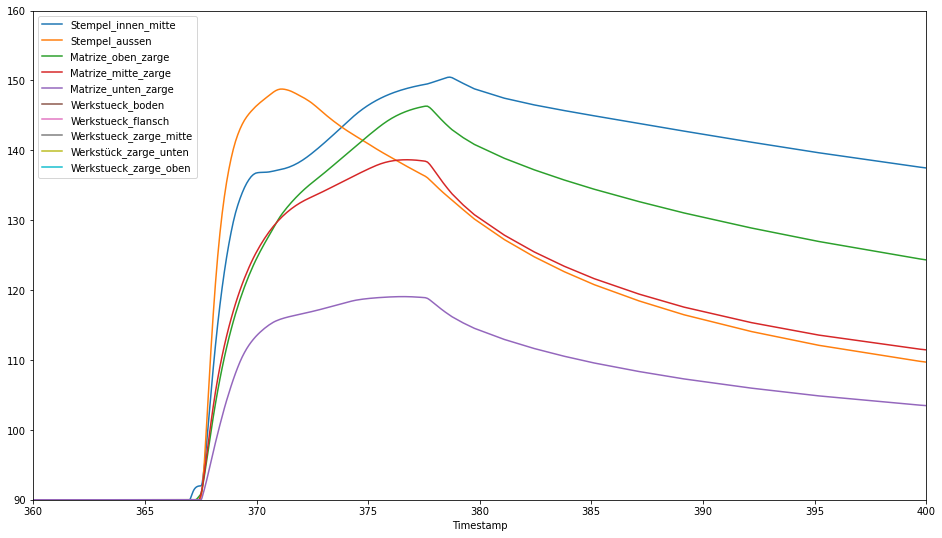

In [7]:
df1.plot(figsize=(16,9))
plt.xlim(360,400)
plt.ylim(90,160)

In [8]:
plot_vars = ['Stempel_innen_mitte', 'Matrize_mitte_zarge', 'Werkstueck_boden', 'Werkstueck_zarge_mitte']
plot_vars_der = [x+'_derivative_1' for x in plot_vars]
start_time = 367

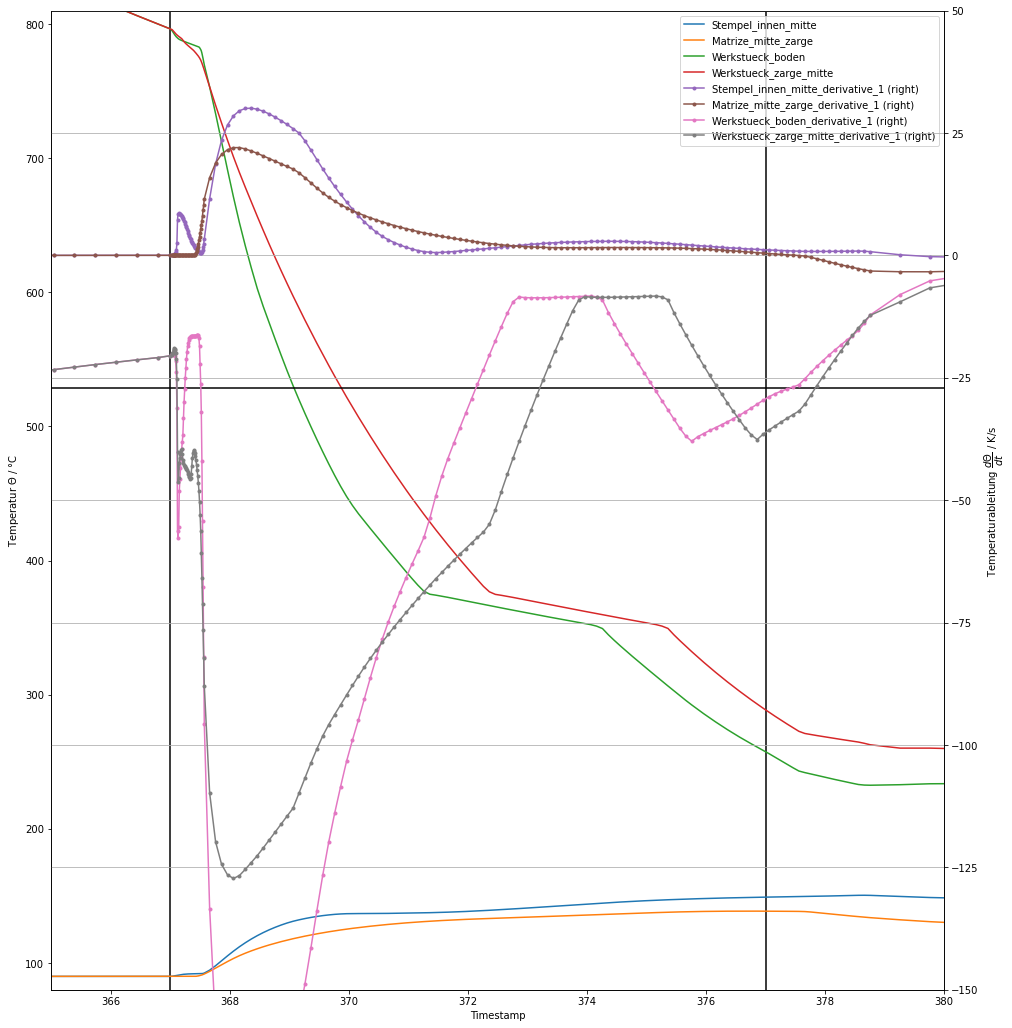

In [9]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df1[plot_vars].plot(ax=ax1)

dX1dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_1.png')

In [10]:
df2 = pd.read_excel('WS950_WZ90_p19_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()
dX2dt = calc_derivative(df2, diff=15).drop(columns='Timestamp_derivative_1')


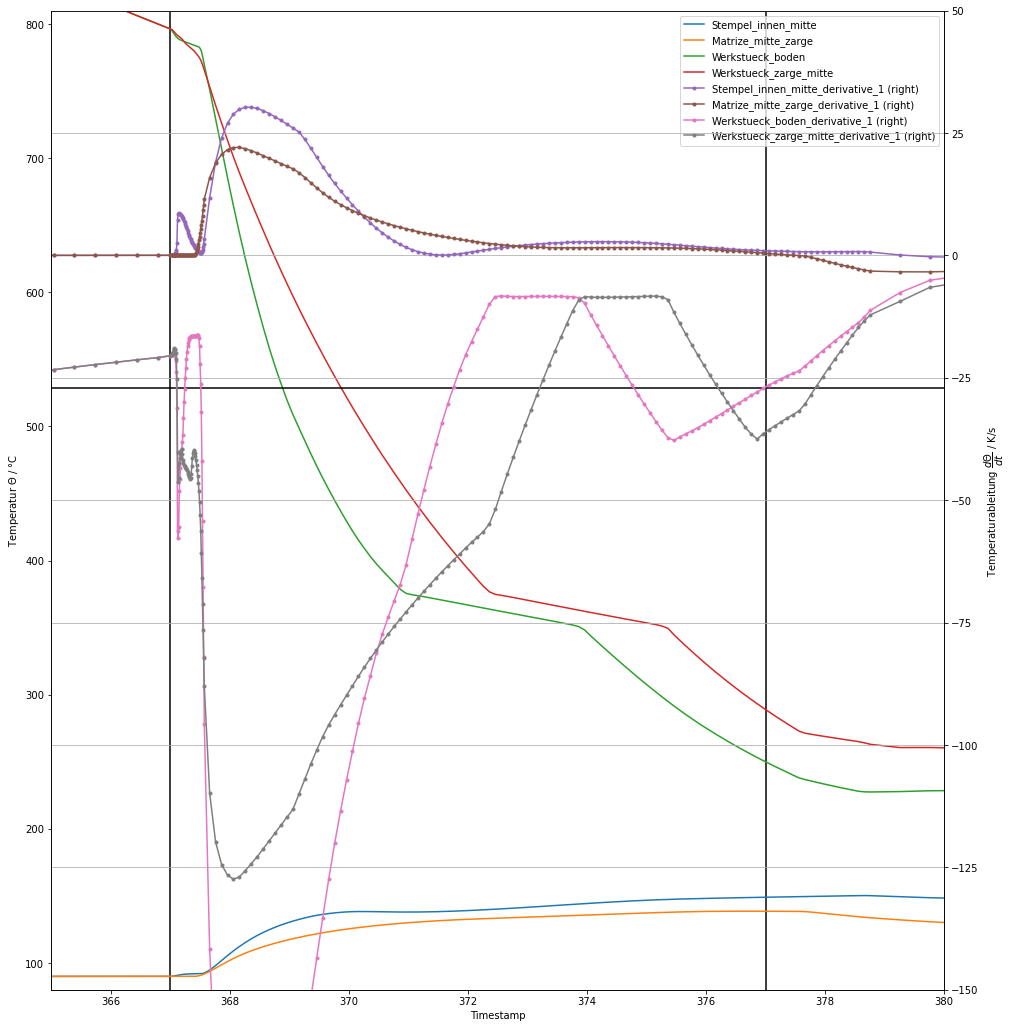

In [11]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df2[plot_vars].plot(ax=ax1)

dX2dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_2.png')

In [12]:
df3 = pd.read_excel('WS950_WZ90_p23_t10.xlsx', sheet_name='Sheet1', index_col='Timestamp').drop_duplicates()
dX3dt = calc_derivative(df3, diff=15).drop(columns='Timestamp_derivative_1')


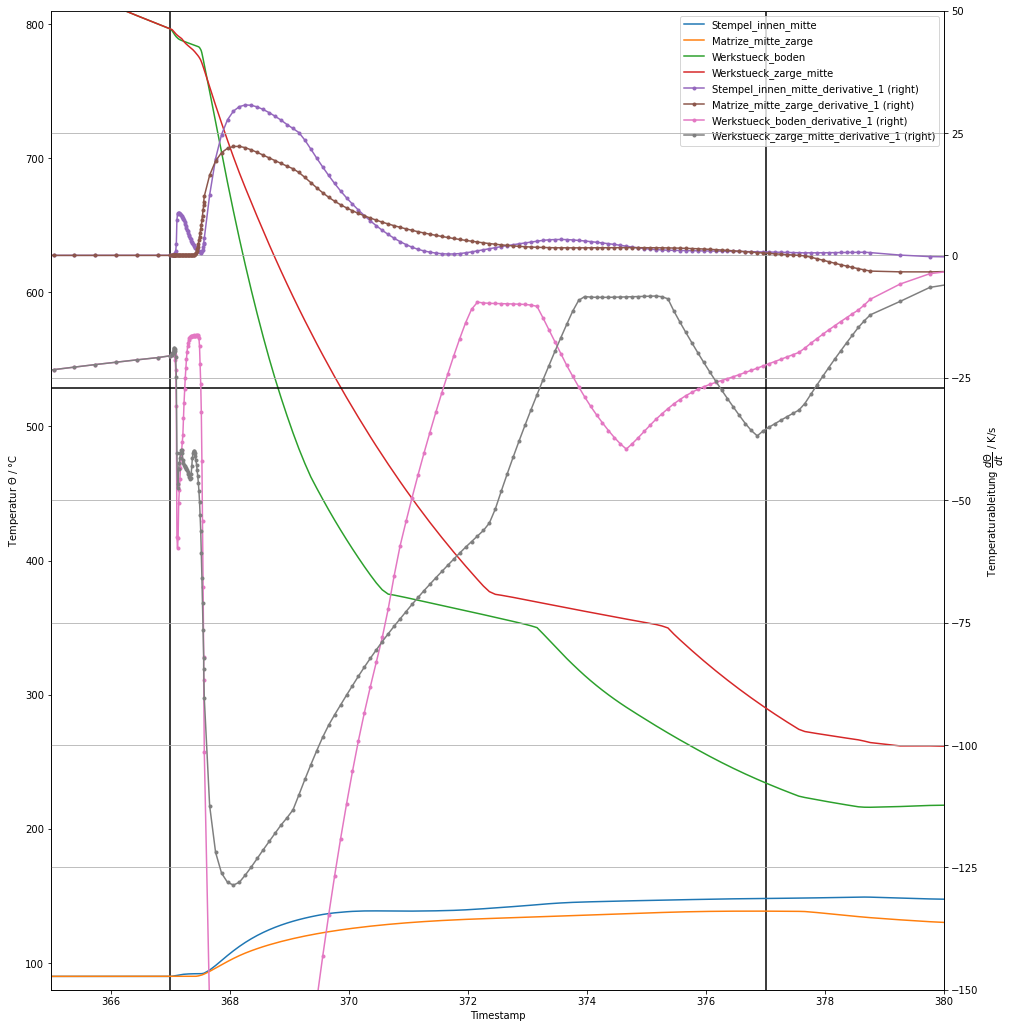

In [13]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df3[plot_vars].plot(ax=ax1)

dX3dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_3.png')

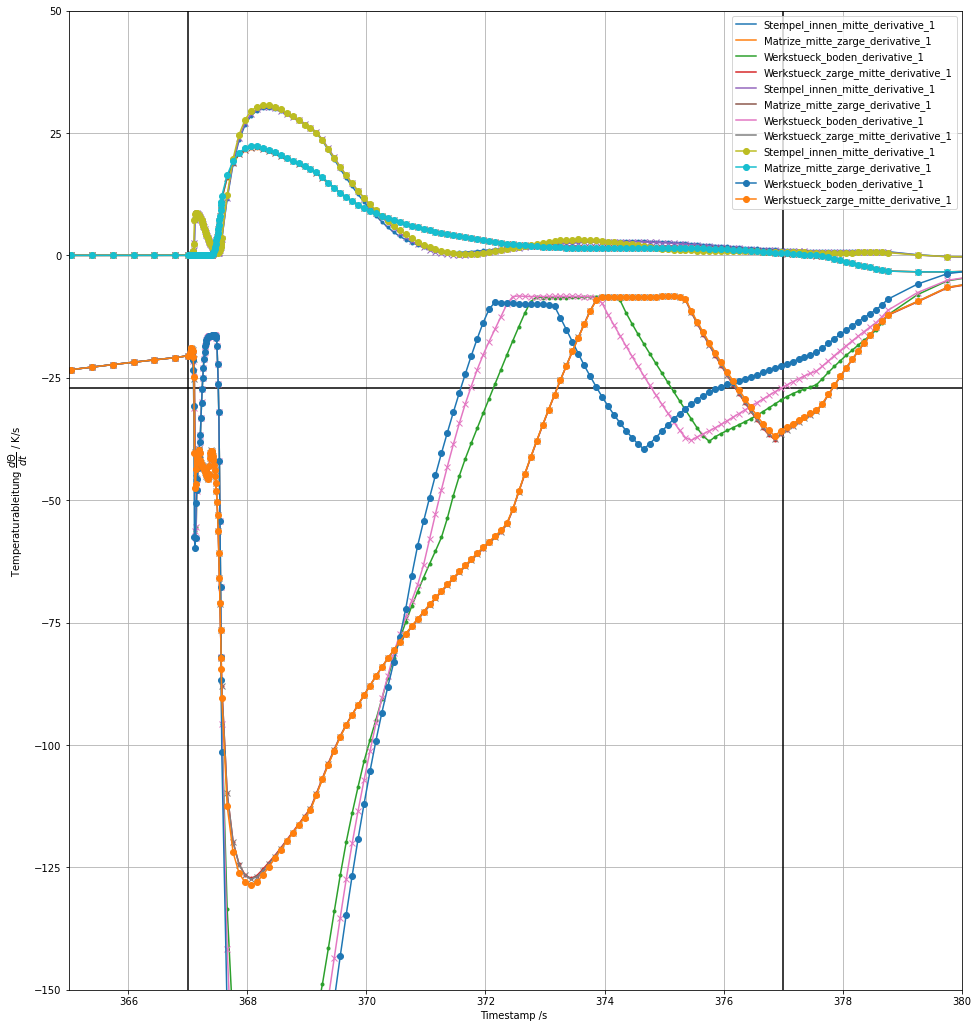

In [14]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(-150, 50)

dX1dt[plot_vars_der].plot(ax=ax1, style='.-')
dX2dt[plot_vars_der].plot(ax=ax1, style='x-')
dX3dt[plot_vars_der].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_derivatives_123.png')

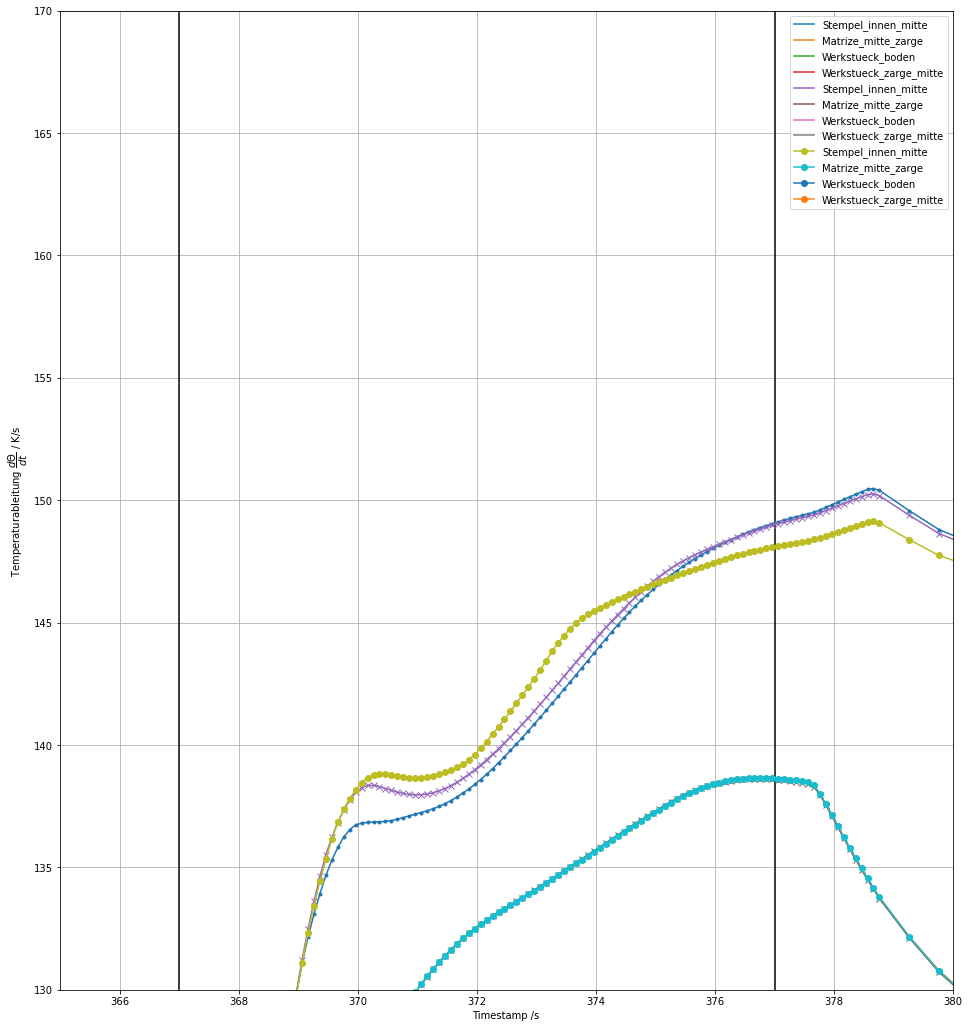

In [15]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')

df1[plot_vars].plot(ax=ax1, style='.-')
df2[plot_vars].plot(ax=ax1, style='x-')
df3[plot_vars].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(130,170)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_123.png')

### df1 und df3 für training nutzen df2 für testen
Vorher: Ableitungen rechts anhängen

In [16]:
df1_wd = df1.join(dX1dt)
df2_wd = df2.join(dX2dt)
df3_wd = df3.join(dX3dt)

In [17]:
train = df1_wd.reset_index().append(df3_wd.reset_index()).dropna()
test = df2_wd.reset_index().dropna()

In [18]:
train.keys()

Index(['Timestamp', 'Stempel_innen_mitte', 'Stempel_aussen',
       'Matrize_oben_zarge', 'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Werkstueck_boden', 'Werkstueck_flansch', 'Werkstueck_zarge_mitte',
       'Werkstück_zarge_unten', 'Werkstueck_zarge_oben',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_flansch_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstück_zarge_unten_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [19]:

Werkstueck_labels = ['Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1','Timestamp']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben']
 

In [20]:
X_train = train.drop(labels=Werkstueck_labels , axis=1)
y_train = train[targets]
X_test = test.drop(labels=Werkstueck_labels, axis=1)
y_test = test[targets]

### Simple linear model as baseline

In [21]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:104.57812005423273, R2:0.8215426284613343
test set RMSE:105.22181480887834, R2:0.8195158605677617


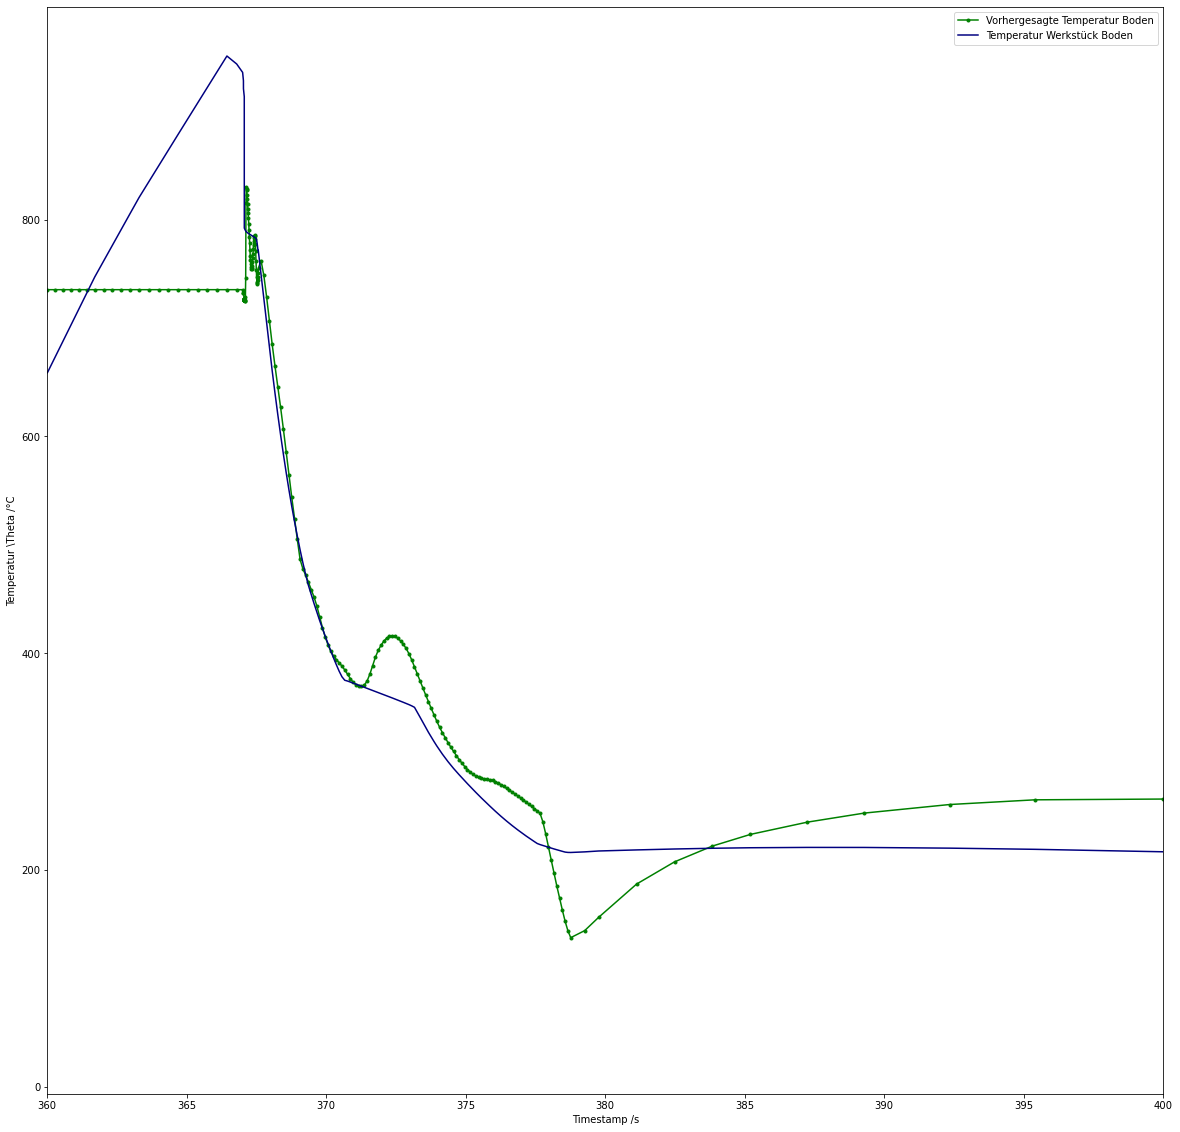

In [23]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp[6:], df3['Werkstueck_boden'][5:],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:96.55137908430358, R2:0.8479046389506653
test set RMSE:97.2402264191433, R2:0.8459236198588183


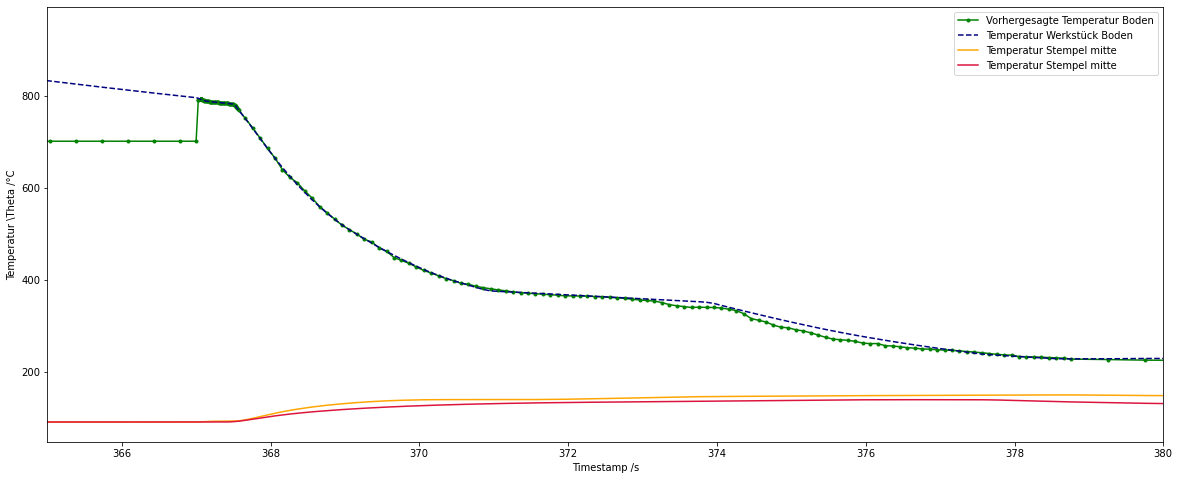

In [26]:
plt.figure(figsize=(20,8))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(test.Timestamp[5:], df3['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
plt.plot(test.Timestamp[5:], df3['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(365, 380)
plt.legend()
plt.savefig('plots/random_forest_model.png')

In [27]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [28]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:96.37158668316754, R2:0.8484739620648251
test set RMSE:97.13276835020547, R2:0.8462926095247255


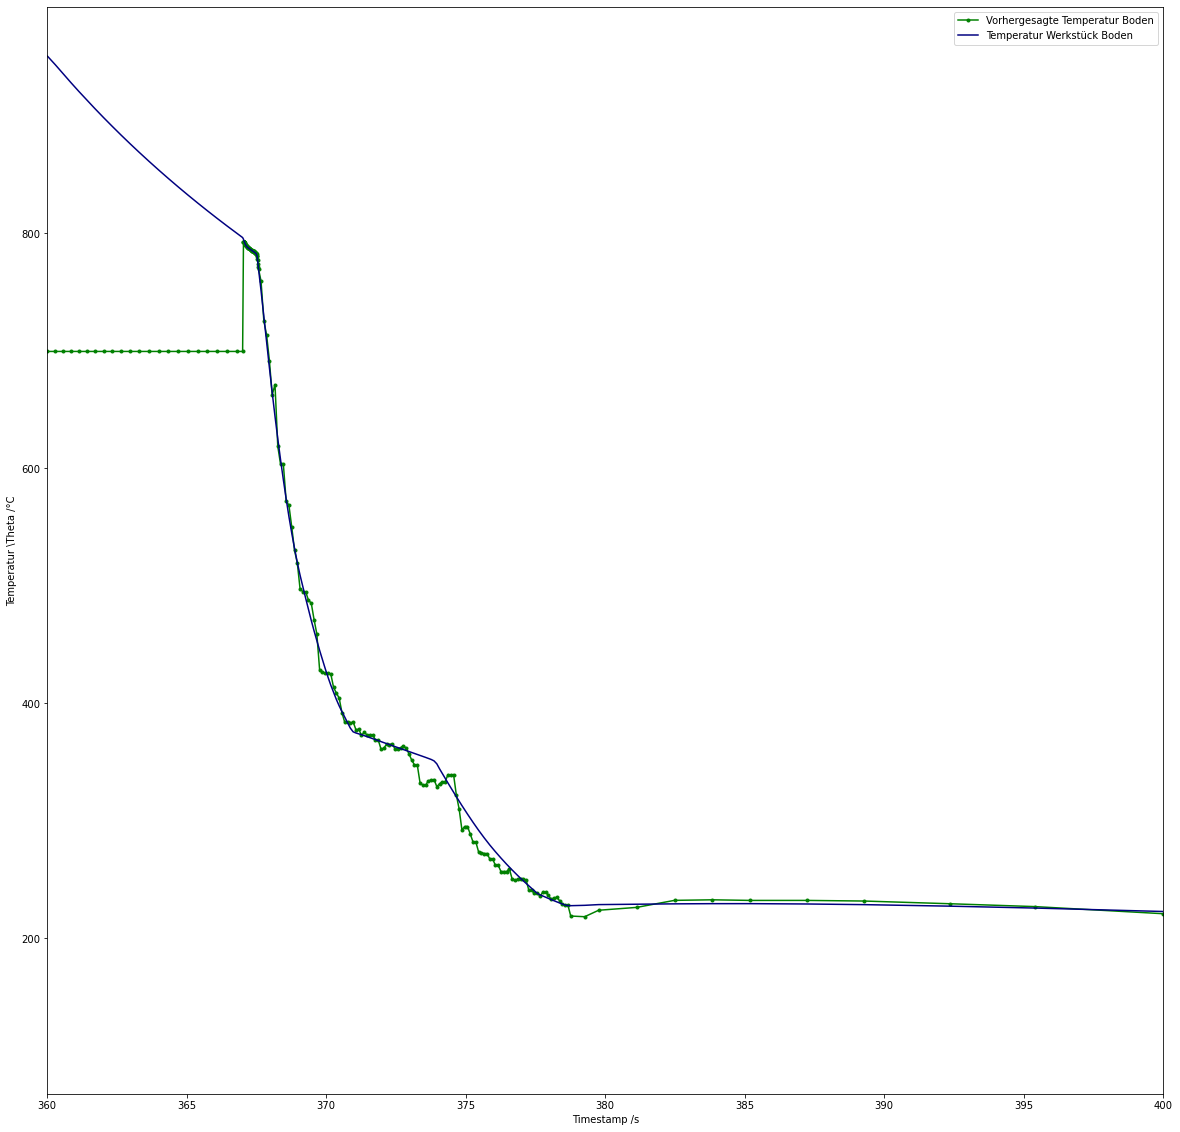

In [29]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [32]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 3,397
Trainable params: 3,397
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
19/19 [==============================] - 1s 9ms/step - loss: 339489.2188 - val_loss: 313663.4688
Epoch 2/300
19/19 [==============================] - 0s 2ms/step - loss: 288087.0000 - val_loss: 245458.1094
Epoch 3/300
19/19 [==============================] - 0s 3ms/step - loss: 204150.4062 - val_loss: 155698.9375
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 138769.0625 - val_loss: 126774.3047
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 119449.7109 - val_loss: 113738.7734
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 112430.5078 - val_loss: 110304.1562
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 110377.3984 - val_loss: 108616.2969
Epoch 8/300
19/19 [==============================] - 0s 3ms/step - loss: 108489.0938 - val_loss: 107868.3750
Epoch 9/300
19/19 [==============================] - 0s 3ms/step - loss: 107810.8672 - val_loss: 107211.5391
Epoch 10/300
19/19 

19/19 [==============================] - 0s 3ms/step - loss: 12951.2070 - val_loss: 12603.1123
Epoch 77/300
19/19 [==============================] - 0s 3ms/step - loss: 12927.9180 - val_loss: 12567.2344
Epoch 78/300
19/19 [==============================] - 0s 3ms/step - loss: 12870.6953 - val_loss: 13044.3564
Epoch 79/300
19/19 [==============================] - 0s 3ms/step - loss: 13216.5098 - val_loss: 12827.3467
Epoch 80/300
19/19 [==============================] - 0s 3ms/step - loss: 12879.3486 - val_loss: 12515.3945
Epoch 81/300
19/19 [==============================] - 0s 3ms/step - loss: 12711.7109 - val_loss: 12426.6416
Epoch 82/300
19/19 [==============================] - 0s 3ms/step - loss: 12789.2656 - val_loss: 12363.2510
Epoch 83/300
19/19 [==============================] - 0s 3ms/step - loss: 12693.4014 - val_loss: 12706.9629
Epoch 84/300
19/19 [==============================] - 0s 3ms/step - loss: 12615.4980 - val_loss: 12340.7715
Epoch 85/300
19/19 [=====================

19/19 [==============================] - 0s 3ms/step - loss: 11677.4922 - val_loss: 11879.2422
Epoch 152/300
19/19 [==============================] - 0s 3ms/step - loss: 11567.3818 - val_loss: 11729.1162
Epoch 153/300
19/19 [==============================] - 0s 3ms/step - loss: 11627.4365 - val_loss: 11503.6465
Epoch 154/300
19/19 [==============================] - 0s 3ms/step - loss: 11555.4238 - val_loss: 11497.6387
Epoch 155/300
19/19 [==============================] - 0s 3ms/step - loss: 11578.1807 - val_loss: 11582.6299
Epoch 156/300
19/19 [==============================] - 0s 3ms/step - loss: 11593.4961 - val_loss: 11483.8457
Epoch 157/300
19/19 [==============================] - 0s 3ms/step - loss: 11920.2441 - val_loss: 11721.5557
Epoch 158/300
19/19 [==============================] - 0s 3ms/step - loss: 11769.8174 - val_loss: 11560.3281
Epoch 159/300
19/19 [==============================] - 0s 3ms/step - loss: 11892.8965 - val_loss: 11483.5479
Epoch 160/300
19/19 [============

19/19 [==============================] - 0s 4ms/step - loss: 11957.4219 - val_loss: 11568.9883
Epoch 227/300
19/19 [==============================] - 0s 4ms/step - loss: 11283.1992 - val_loss: 11979.1924
Epoch 228/300
19/19 [==============================] - 0s 3ms/step - loss: 11393.6016 - val_loss: 11236.0303
Epoch 229/300
19/19 [==============================] - 0s 3ms/step - loss: 11340.2227 - val_loss: 11737.7471
Epoch 230/300
19/19 [==============================] - 0s 3ms/step - loss: 11426.6895 - val_loss: 11633.2930
Epoch 231/300
19/19 [==============================] - 0s 3ms/step - loss: 11380.1367 - val_loss: 11145.0117
Epoch 232/300
19/19 [==============================] - 0s 3ms/step - loss: 11211.7373 - val_loss: 11130.8564
Epoch 233/300
19/19 [==============================] - 0s 3ms/step - loss: 11210.6133 - val_loss: 11117.6221
Epoch 234/300
19/19 [==============================] - 0s 3ms/step - loss: 11156.5234 - val_loss: 11605.4346
Epoch 235/300
19/19 [============

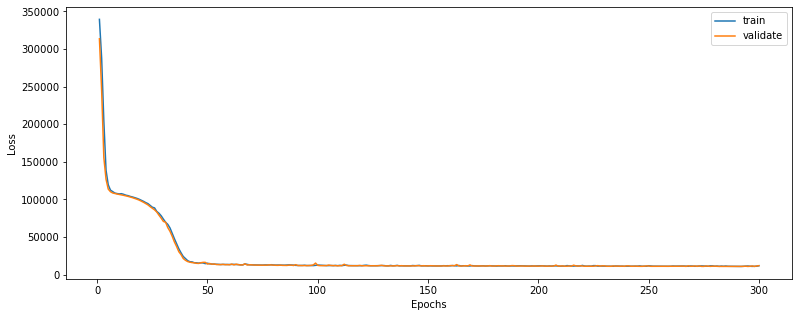

In [34]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [35]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:109.4709982357951, R2:0.8046572161960424
test set RMSE:109.23042003141079, R2:0.8057359393283587


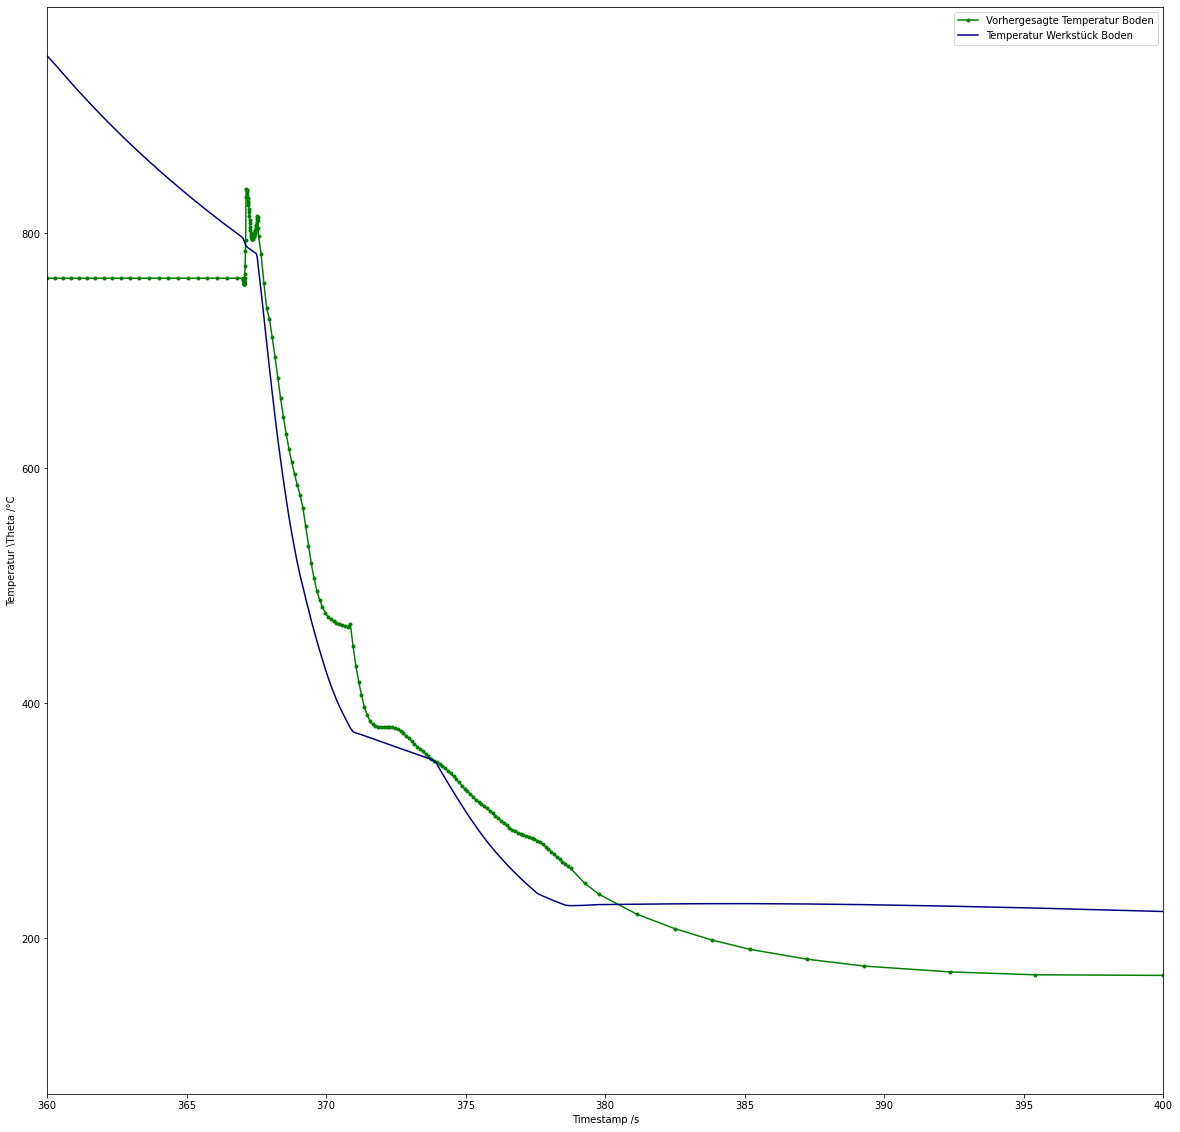

In [36]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

plt.savefig('plots/mlp.png')

### Lagged Variables?

In [37]:
def add_specific_lags(df_input, list_of_lags):
    columns=df_input.keys()
    print(columns)
    df = df_input.copy()
    for i in list_of_lags:
        lagged_columns = [str(col) + '_lag_{}'.format(i) for col in columns]
        df[lagged_columns] = df[columns].shift(i)
    df.dropna(inplace=True)
    return df

In [38]:
specific_lags = [1,2,3,4,5,10,20]

In [39]:
X_train_lagged = add_specific_lags(X_train, specific_lags)
X_test_lagged = add_specific_lags(X_test, specific_lags)


Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_oben_zarge',
       'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1'],
      dtype='object')
Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_oben_zarge',
       'Matrize_mitte_zarge', 'Matrize_unten_zarge',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
       'Matrize_unten_zarge_derivative_1'],
      dtype='object')


In [40]:
idx = X_train_lagged.index
y_train_lagged = y_train.iloc[idx]


In [41]:
input_dim = len(X_train_lagged.keys())
print(len(X_train_lagged.columns))
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(output_dim))
model.summary()

80
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 405       
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train_lagged, y_train_lagged,
                    validation_data=(X_test_lagged, y_test[20:]),
                    epochs=epochs)

Epoch 1/300
18/18 [==============================] - 0s 9ms/step - loss: 366380.6250 - val_loss: 376344.2188
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 361985.7188 - val_loss: 375749.1562
Epoch 3/300
18/18 [==============================] - 0s 3ms/step - loss: 361854.5312 - val_loss: 375727.5312
Epoch 4/300
18/18 [==============================] - 0s 3ms/step - loss: 361833.1562 - val_loss: 375705.7812
Epoch 5/300
18/18 [==============================] - 0s 3ms/step - loss: 361811.8438 - val_loss: 375683.8750
Epoch 6/300
18/18 [==============================] - 0s 3ms/step - loss: 361790.3750 - val_loss: 375662.2188
Epoch 7/300
18/18 [==============================] - 0s 3ms/step - loss: 361768.9688 - val_loss: 375640.4688
Epoch 8/300
18/18 [==============================] - 0s 3ms/step - loss: 361747.6875 - val_loss: 375618.5312
Epoch 9/300
18/18 [==============================] - 0s 3ms/step - loss: 361726.0625 - val_loss: 375596.7812
Epoch 10/300
18/18 

18/18 [==============================] - 0s 3ms/step - loss: 356318.0625 - val_loss: 370021.6875
Epoch 76/300
18/18 [==============================] - 0s 3ms/step - loss: 356151.5312 - val_loss: 369852.5938
Epoch 77/300
18/18 [==============================] - 0s 3ms/step - loss: 355983.7812 - val_loss: 369680.3125
Epoch 78/300
18/18 [==============================] - 0s 4ms/step - loss: 355812.9062 - val_loss: 369505.8750
Epoch 79/300
18/18 [==============================] - 0s 3ms/step - loss: 355639.9688 - val_loss: 369327.9062
Epoch 80/300
18/18 [==============================] - 0s 3ms/step - loss: 355464.7188 - val_loss: 369146.1562
Epoch 81/300
18/18 [==============================] - 0s 3ms/step - loss: 355284.9375 - val_loss: 368963.9375
Epoch 82/300
18/18 [==============================] - 0s 3ms/step - loss: 355103.8125 - val_loss: 368778.5625
Epoch 83/300
18/18 [==============================] - 0s 3ms/step - loss: 354920.1562 - val_loss: 368589.6562
Epoch 84/300
18/18 [===

18/18 [==============================] - 0s 3ms/step - loss: 336831.3438 - val_loss: 350098.9688
Epoch 150/300
18/18 [==============================] - 0s 3ms/step - loss: 336479.2500 - val_loss: 349736.8125
Epoch 151/300
18/18 [==============================] - 0s 3ms/step - loss: 336122.6250 - val_loss: 349374.1250
Epoch 152/300
18/18 [==============================] - 0s 3ms/step - loss: 335765.2188 - val_loss: 349008.9062
Epoch 153/300
18/18 [==============================] - 0s 3ms/step - loss: 335406.5625 - val_loss: 348639.9062
Epoch 154/300
18/18 [==============================] - 0s 3ms/step - loss: 335044.0938 - val_loss: 348270.8438
Epoch 155/300
18/18 [==============================] - 0s 3ms/step - loss: 334679.3438 - val_loss: 347902.2812
Epoch 156/300
18/18 [==============================] - 0s 3ms/step - loss: 334317.5000 - val_loss: 347525.7812
Epoch 157/300
18/18 [==============================] - 0s 3ms/step - loss: 333947.9375 - val_loss: 347152.2812
Epoch 158/300
1

Epoch 223/300
18/18 [==============================] - 0s 3ms/step - loss: 306441.9375 - val_loss: 319102.2188
Epoch 224/300
18/18 [==============================] - 0s 3ms/step - loss: 305986.9688 - val_loss: 318636.5000
Epoch 225/300
18/18 [==============================] - 0s 2ms/step - loss: 305532.2188 - val_loss: 318164.1250
Epoch 226/300
18/18 [==============================] - 0s 3ms/step - loss: 305067.3125 - val_loss: 317701.4375
Epoch 227/300
18/18 [==============================] - 0s 3ms/step - loss: 304611.8438 - val_loss: 317229.0625
Epoch 228/300
18/18 [==============================] - 0s 3ms/step - loss: 304148.1562 - val_loss: 316760.3750
Epoch 229/300
18/18 [==============================] - 0s 3ms/step - loss: 303686.0312 - val_loss: 316291.1562
Epoch 230/300
18/18 [==============================] - 0s 3ms/step - loss: 303224.8125 - val_loss: 315817.9375
Epoch 231/300
18/18 [==============================] - 0s 3ms/step - loss: 302760.6875 - val_loss: 315344.3750
E

Epoch 297/300
18/18 [==============================] - 0s 3ms/step - loss: 270429.3438 - val_loss: 282347.5312
Epoch 298/300
18/18 [==============================] - 0s 3ms/step - loss: 269912.1250 - val_loss: 281831.2812
Epoch 299/300
18/18 [==============================] - 0s 3ms/step - loss: 269407.2500 - val_loss: 281303.0000
Epoch 300/300
18/18 [==============================] - 0s 3ms/step - loss: 268888.1875 - val_loss: 280787.6250


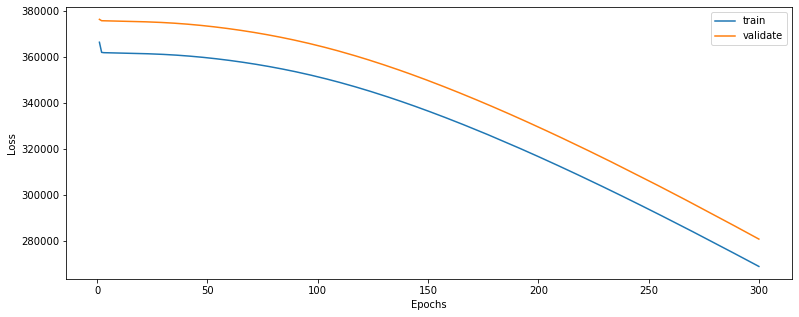

In [43]:
plot_loss(history)

In [44]:
y_hat_train = model.predict(X_train_lagged)
evaluate(y_train[20:], y_hat_train, 'train')

y_hat_test = model.predict(X_test_lagged)
evaluate(y_test[20:], y_hat_test)

train set RMSE:527.2736336336288, R2:-3.4651820370477693
test set RMSE:529.8939839459508, R2:-3.4102413204462296


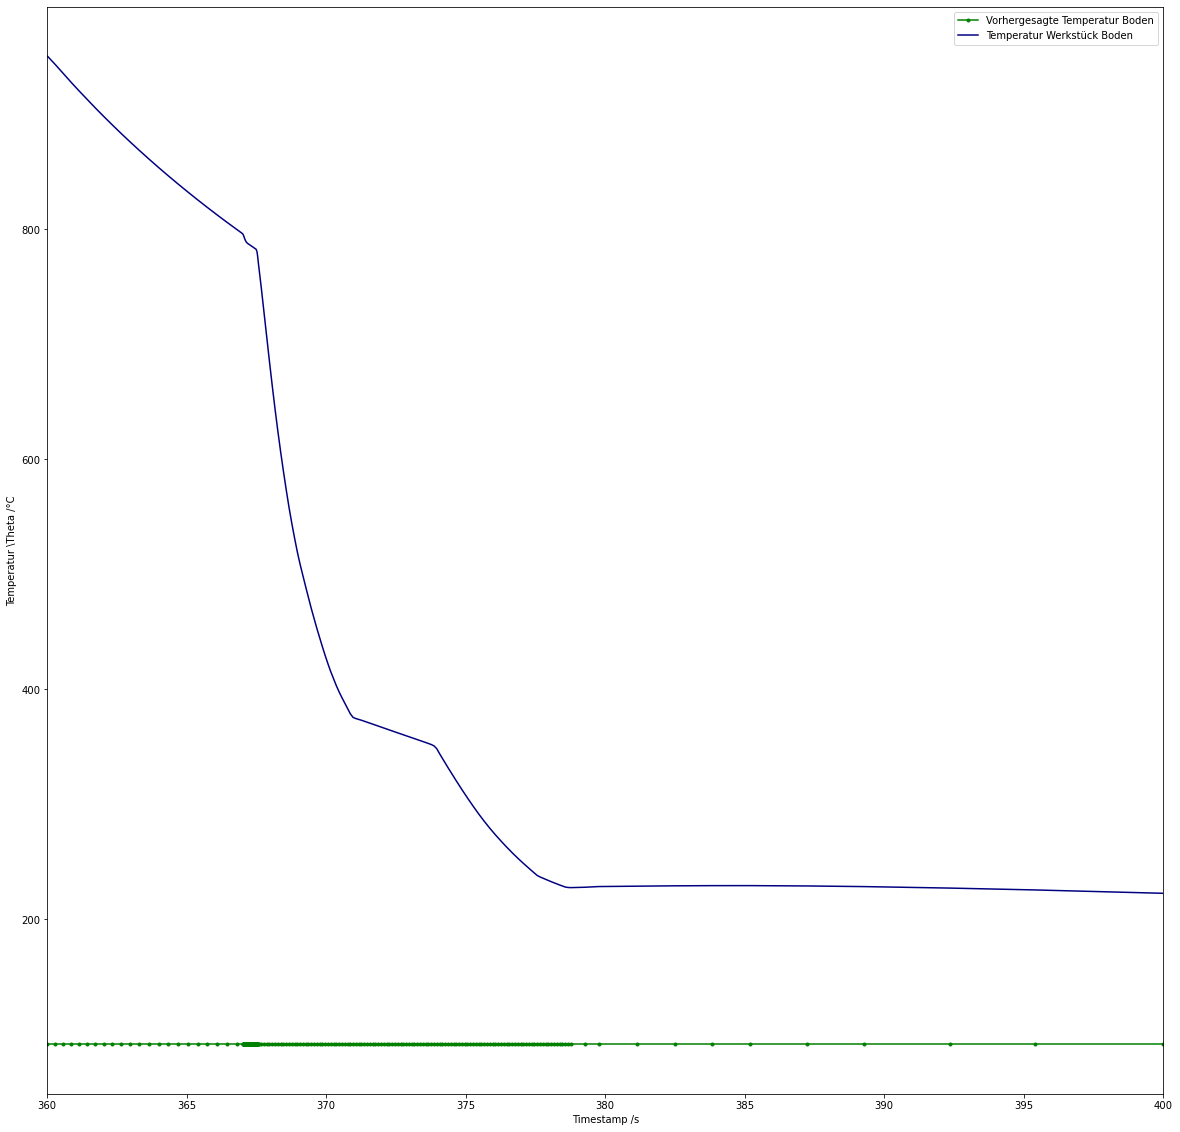

In [45]:
plt.figure(figsize=(20,20))
plt.plot(test.Timestamp[20:], y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(test.Timestamp[20:], y_test['Werkstueck_boden'][20:],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(360, 400)
plt.legend()

More Layers? Different Architecture? 

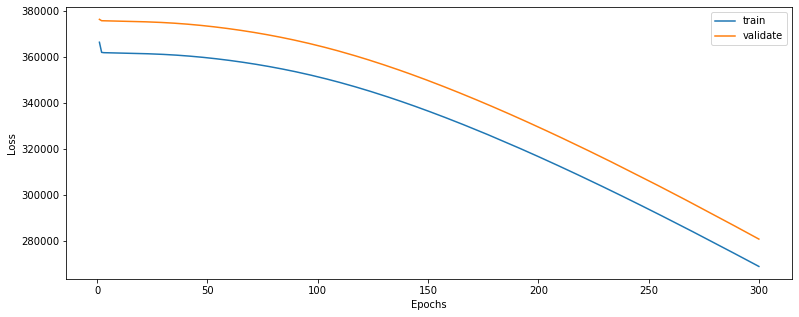

In [46]:
plot_loss(history)

# LSTM?

In [47]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
tf.__version__

'2.8.0'

In [48]:
# taken from the TF Documentation
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train, val_df=test, test_df=test,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
    def plot(self, model=None, plot_col='Werkstueck_boden', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [min]')
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
    # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
    # And cache it for next time
        self._example = result
        return result


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(amsgrad=True),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history



Total window size: 200
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Label column name(s): ['Werkstueck_boden', 'Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten', 'Werkstueck_zarge_oben']

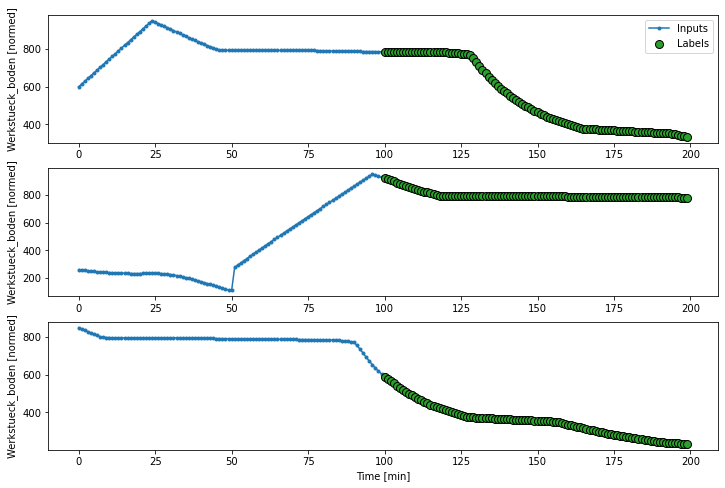

In [49]:
OUT_STEPS = 100
MAX_EPOCHS = 300
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=targets,
                               train_df=train,
                               val_df=test)

multi_window.plot()
multi_window

In [52]:
num_features = output_dim
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/300
13/13 [==============================] - 7s 185ms/step - loss: 333815.7500 - mean_absolute_error: 525.2057 - mean_squared_error: 333815.8125 - val_loss: 217328.6094 - val_mean_absolute_error: 428.4243 - val_mean_squared_error: 217328.6094
Epoch 2/300
13/13 [==============================] - 1s 111ms/step - loss: 332234.9688 - mean_absolute_error: 523.7106 - mean_squared_error: 332234.9688 - val_loss: 215451.5312 - val_mean_absolute_error: 426.2322 - val_mean_squared_error: 215451.5312
Epoch 3/300
13/13 [==============================] - 1s 109ms/step - loss: 330014.8750 - mean_absolute_error: 521.5219 - mean_squared_error: 330014.8125 - val_loss: 213609.1094 - val_mean_absolute_error: 424.0661 - val_mean_squared_error: 213609.1250
Epoch 4/300
13/13 [==============================] - 2s 117ms/step - loss: 327553.0625 - mean_absolute_error: 519.1949 - mean_squared_error: 327553.0625 - val_loss: 211830.1250 - val_mean_absolute_error: 421.9619 - val_mean_squared_error: 211830.1

13/13 [==============================] - 6s 463ms/step - loss: 277795.9375 - mean_absolute_error: 468.8540 - mean_squared_error: 277795.9688 - val_loss: 172041.6562 - val_mean_absolute_error: 371.9089 - val_mean_squared_error: 172041.6719
Epoch 34/300
13/13 [==============================] - 5s 406ms/step - loss: 276286.5625 - mean_absolute_error: 467.2328 - mean_squared_error: 276286.5625 - val_loss: 170828.9688 - val_mean_absolute_error: 370.2770 - val_mean_squared_error: 170828.9688
Epoch 35/300
13/13 [==============================] - 7s 573ms/step - loss: 274772.4688 - mean_absolute_error: 465.6019 - mean_squared_error: 274772.5000 - val_loss: 169626.4219 - val_mean_absolute_error: 368.6503 - val_mean_squared_error: 169626.4375
Epoch 36/300
13/13 [==============================] - 6s 430ms/step - loss: 273270.0938 - mean_absolute_error: 463.9803 - mean_squared_error: 273270.0625 - val_loss: 168434.6094 - val_mean_absolute_error: 367.0353 - val_mean_squared_error: 168434.6094
Epoch

13/13 [==============================] - 6s 445ms/step - loss: 233124.7031 - mean_absolute_error: 418.5070 - mean_squared_error: 233124.7188 - val_loss: 137060.1250 - val_mean_absolute_error: 321.6048 - val_mean_squared_error: 137060.1094
Epoch 66/300
13/13 [==============================] - 6s 430ms/step - loss: 231840.4844 - mean_absolute_error: 416.9778 - mean_squared_error: 231840.5000 - val_loss: 136076.8438 - val_mean_absolute_error: 320.0833 - val_mean_squared_error: 136076.8438
Epoch 67/300
13/13 [==============================] - 5s 341ms/step - loss: 230560.7656 - mean_absolute_error: 415.4732 - mean_squared_error: 230560.7812 - val_loss: 135115.9844 - val_mean_absolute_error: 318.5852 - val_mean_squared_error: 135115.9844
Epoch 68/300
13/13 [==============================] - 3s 196ms/step - loss: 229304.7656 - mean_absolute_error: 413.9692 - mean_squared_error: 229304.7812 - val_loss: 134140.7188 - val_mean_absolute_error: 317.0590 - val_mean_squared_error: 134140.7344
Epoch

13/13 [==============================] - 3s 220ms/step - loss: 195577.6875 - mean_absolute_error: 372.1032 - mean_squared_error: 195577.6875 - val_loss: 108660.0625 - val_mean_absolute_error: 274.3086 - val_mean_squared_error: 108660.0547
Epoch 98/300
13/13 [==============================] - 3s 239ms/step - loss: 194499.5781 - mean_absolute_error: 370.7227 - mean_squared_error: 194499.5938 - val_loss: 107866.1172 - val_mean_absolute_error: 272.8823 - val_mean_squared_error: 107866.1172
Epoch 99/300
13/13 [==============================] - 3s 208ms/step - loss: 193427.6094 - mean_absolute_error: 369.3443 - mean_squared_error: 193427.5781 - val_loss: 107072.1719 - val_mean_absolute_error: 271.4461 - val_mean_squared_error: 107072.1641
Epoch 100/300
13/13 [==============================] - 3s 241ms/step - loss: 192362.6094 - mean_absolute_error: 367.9744 - mean_squared_error: 192362.5938 - val_loss: 106290.7734 - val_mean_absolute_error: 270.0291 - val_mean_squared_error: 106290.7812
Epoc

Epoch 130/300
13/13 [==============================] - 2s 177ms/step - loss: 163357.5625 - mean_absolute_error: 329.4416 - mean_squared_error: 163357.5469 - val_loss: 85277.8516 - val_mean_absolute_error: 230.0228 - val_mean_squared_error: 85277.8516
Epoch 131/300
13/13 [==============================] - 2s 170ms/step - loss: 162488.7031 - mean_absolute_error: 328.2447 - mean_squared_error: 162488.7031 - val_loss: 84651.1406 - val_mean_absolute_error: 228.8035 - val_mean_squared_error: 84651.1406
Epoch 132/300
13/13 [==============================] - 2s 177ms/step - loss: 161608.0000 - mean_absolute_error: 327.0712 - mean_squared_error: 161608.0312 - val_loss: 84039.8750 - val_mean_absolute_error: 227.6063 - val_mean_squared_error: 84039.8672
Epoch 133/300
13/13 [==============================] - 2s 175ms/step - loss: 160741.1875 - mean_absolute_error: 325.9103 - mean_squared_error: 160741.2031 - val_loss: 83431.3984 - val_mean_absolute_error: 226.4156 - val_mean_squared_error: 83431.3

Epoch 163/300
13/13 [==============================] - 2s 172ms/step - loss: 137515.3594 - mean_absolute_error: 294.6752 - mean_squared_error: 137515.3594 - val_loss: 67456.7734 - val_mean_absolute_error: 194.1095 - val_mean_squared_error: 67456.7656
Epoch 164/300
13/13 [==============================] - 2s 180ms/step - loss: 136829.1719 - mean_absolute_error: 293.7556 - mean_squared_error: 136829.1875 - val_loss: 66998.1406 - val_mean_absolute_error: 193.1629 - val_mean_squared_error: 66998.1328
Epoch 165/300
13/13 [==============================] - 2s 176ms/step - loss: 136153.5781 - mean_absolute_error: 292.8426 - mean_squared_error: 136153.5625 - val_loss: 66542.2578 - val_mean_absolute_error: 192.2215 - val_mean_squared_error: 66542.2500
Epoch 166/300
13/13 [==============================] - 3s 250ms/step - loss: 135474.5156 - mean_absolute_error: 291.9451 - mean_squared_error: 135474.5312 - val_loss: 66101.6094 - val_mean_absolute_error: 191.3099 - val_mean_squared_error: 66101.6

Epoch 196/300
13/13 [==============================] - 4s 288ms/step - loss: 117537.8906 - mean_absolute_error: 268.6930 - mean_squared_error: 117537.8984 - val_loss: 54524.4297 - val_mean_absolute_error: 167.6084 - val_mean_squared_error: 54524.4336
Epoch 197/300
13/13 [==============================] - 5s 350ms/step - loss: 117013.9219 - mean_absolute_error: 268.0499 - mean_squared_error: 117013.9062 - val_loss: 54198.6367 - val_mean_absolute_error: 166.9707 - val_mean_squared_error: 54198.6328
Epoch 198/300
13/13 [==============================] - 4s 331ms/step - loss: 116493.9766 - mean_absolute_error: 267.4112 - mean_squared_error: 116493.9609 - val_loss: 53874.9609 - val_mean_absolute_error: 166.3380 - val_mean_squared_error: 53874.9648
Epoch 199/300
13/13 [==============================] - 3s 239ms/step - loss: 115972.7109 - mean_absolute_error: 266.7728 - mean_squared_error: 115972.7188 - val_loss: 53549.0430 - val_mean_absolute_error: 165.7011 - val_mean_squared_error: 53549.0

Epoch 229/300
13/13 [==============================] - 3s 194ms/step - loss: 102261.5469 - mean_absolute_error: 250.1757 - mean_squared_error: 102261.5625 - val_loss: 45392.5742 - val_mean_absolute_error: 149.8298 - val_mean_squared_error: 45392.5781
Epoch 230/300
13/13 [==============================] - 2s 179ms/step - loss: 101866.4062 - mean_absolute_error: 249.6998 - mean_squared_error: 101866.4141 - val_loss: 45168.5859 - val_mean_absolute_error: 149.3932 - val_mean_squared_error: 45168.5820
Epoch 231/300
13/13 [==============================] - 3s 218ms/step - loss: 101481.2031 - mean_absolute_error: 249.2390 - mean_squared_error: 101481.2031 - val_loss: 44945.5000 - val_mean_absolute_error: 148.9576 - val_mean_squared_error: 44945.5000
Epoch 232/300
13/13 [==============================] - 3s 190ms/step - loss: 101083.7656 - mean_absolute_error: 248.7635 - mean_squared_error: 101083.7656 - val_loss: 44719.7891 - val_mean_absolute_error: 148.5157 - val_mean_squared_error: 44719.7

Epoch 262/300
13/13 [==============================] - 3s 230ms/step - loss: 90729.7109 - mean_absolute_error: 236.3967 - mean_squared_error: 90729.7266 - val_loss: 39123.4414 - val_mean_absolute_error: 137.4532 - val_mean_squared_error: 39123.4414
Epoch 263/300
13/13 [==============================] - 3s 223ms/step - loss: 90430.3125 - mean_absolute_error: 236.0413 - mean_squared_error: 90430.3047 - val_loss: 38970.1641 - val_mean_absolute_error: 137.1460 - val_mean_squared_error: 38970.1602
Epoch 264/300
13/13 [==============================] - 3s 218ms/step - loss: 90133.6719 - mean_absolute_error: 235.6850 - mean_squared_error: 90133.6641 - val_loss: 38823.6094 - val_mean_absolute_error: 136.8533 - val_mean_squared_error: 38823.6133
Epoch 265/300
13/13 [==============================] - 3s 244ms/step - loss: 89840.7734 - mean_absolute_error: 235.3445 - mean_squared_error: 89840.7656 - val_loss: 38671.6602 - val_mean_absolute_error: 136.5481 - val_mean_squared_error: 38671.6602
Epoc

Epoch 295/300
13/13 [==============================] - 3s 229ms/step - loss: 82072.4688 - mean_absolute_error: 227.4344 - mean_squared_error: 82072.4688 - val_loss: 34979.8555 - val_mean_absolute_error: 131.4414 - val_mean_squared_error: 34979.8555
Epoch 296/300
13/13 [==============================] - 3s 244ms/step - loss: 81855.7188 - mean_absolute_error: 227.2629 - mean_squared_error: 81855.7266 - val_loss: 34883.2500 - val_mean_absolute_error: 131.4258 - val_mean_squared_error: 34883.2500
Epoch 297/300
13/13 [==============================] - 3s 259ms/step - loss: 81632.1250 - mean_absolute_error: 227.0915 - mean_squared_error: 81632.1250 - val_loss: 34782.2031 - val_mean_absolute_error: 131.4031 - val_mean_squared_error: 34782.2031
Epoch 298/300
13/13 [==============================] - 3s 214ms/step - loss: 81410.6016 - mean_absolute_error: 226.9246 - mean_squared_error: 81410.6016 - val_loss: 34682.4531 - val_mean_absolute_error: 131.3838 - val_mean_squared_error: 34682.4492
Epoc

NameError: name 'IPython' is not defined

3/3 [==============================] - 0s 38ms/step - loss: 34491.9531 - mean_absolute_error: 131.3817 - mean_squared_error: 34491.9531


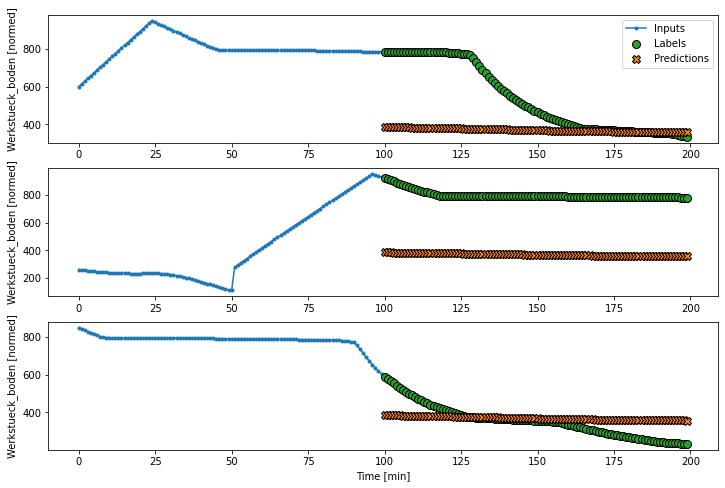

In [53]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)
